In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("trades_slice_1m.csv")

In [81]:
df= df[["TICKET", "LOGIN", "SYMBOL", "PROFIT"]]
df= df[df['SYMBOL'].notnull()]

In [82]:
traders_count= df.groupby(['LOGIN']).agg({'TICKET':'count'})

In [83]:
traders_count= traders_count[traders_count['TICKET'] >= 100].reset_index()

In [84]:
traders= traders_count['LOGIN'].tolist()

In [86]:
filter_df= df[df['LOGIN'].isin(traders)]

In [87]:
filter_df

,TICKET,LOGIN,SYMBOL,PROFIT
1,33308,51023,GBPUSD,1.00
2,33316,51023,GBPUSD,12.00
3,33321,51023,EURUSD,2.00
4,33336,51023,GBPUSD,10.00
5,33387,51023,GBPUSD,38.00
...,...,...,...,...
999994,2093991651,126109,EURUSD,-9.60
999995,2093991652,126109,EURUSD,-9.24
999996,2093991656,571678,EURUSD,0.44
999997,2093991659,126109,EURUSD,-9.06


In [88]:
filter_df['loss'] = np.where(filter_df['PROFIT']<= 0, 1, 0)
filter_df['win'] = np.where(filter_df['PROFIT']> 0, 1, 0)

C:\Users\91709\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91709\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:ylabel='Density'>

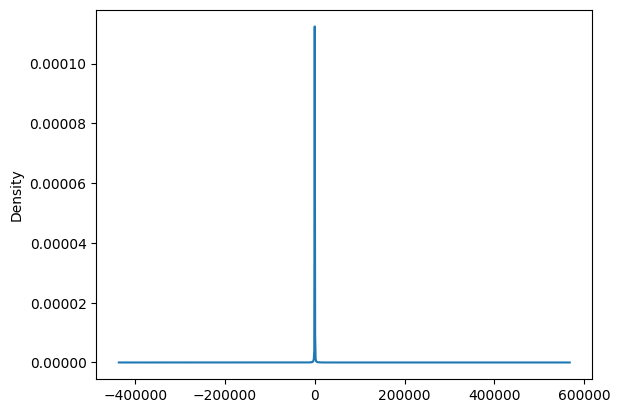

In [89]:
filter_df['PROFIT'].plot.kde()

In [90]:
trader_symbol_grouping= filter_df.groupby(['LOGIN', 'SYMBOL']).agg({'TICKET': 'count', 'PROFIT': 'sum', \
                'loss': 'sum','win': 'sum'}).reset_index()

In [91]:
trader_symbol_grouping['win_rate']= trader_symbol_grouping['win'] / (trader_symbol_grouping['loss'] + \
                                                                     trader_symbol_grouping['win'])

In [92]:
trader_symbol_grouping

,LOGIN,SYMBOL,TICKET,PROFIT,loss,win,win_rate
0,1162,EURGBP,1,-47.29,1,0,0.000000
1,1162,EURUSD,82,-697.00,27,55,0.670732
2,1162,GBPJPY,3,49.46,0,3,1.000000
3,1162,GBPUSD,43,-346.00,8,35,0.813953
4,1162,USDCHF,2,8.92,0,2,1.000000
...,...,...,...,...,...,...,...
8925,6866968,NZDUSD,3,-8.60,3,0,0.000000
8926,6866968,USDCAD,6,-15.98,4,2,0.333333
8927,6866968,USDCHF,7,84.00,2,5,0.714286
8928,6866968,USDJPY,35,-204.65,22,13,0.371429


In [93]:
trader_grouping= filter_df.groupby(['LOGIN']).agg({'TICKET': 'count', 'PROFIT': 'sum', \
                'loss': 'sum','win': 'sum'}).reset_index()

In [94]:
trader_grouping['win_rate']= trader_grouping['win'] / (trader_grouping['loss'] + \
                                                                     trader_grouping['win'])

<AxesSubplot:ylabel='Density'>

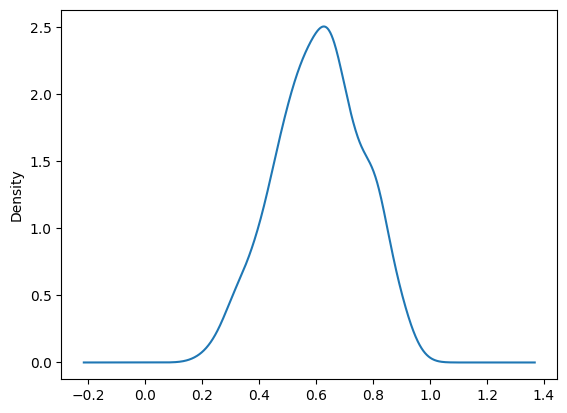

In [95]:
trader_grouping['win_rate'].plot.kde()

In [98]:
symbol_grouping= filter_df.groupby(['SYMBOL']).agg({'TICKET': 'count', 'PROFIT': 'sum', \
                'loss': 'sum','win': 'sum'}).reset_index()

In [99]:
symbol_grouping['win_rate']= symbol_grouping['win'] / (symbol_grouping['loss'] + \
                                                                     symbol_grouping['win'])

<AxesSubplot:ylabel='Density'>

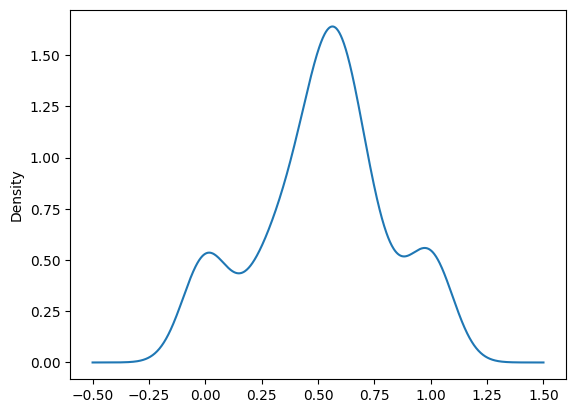

In [100]:
symbol_grouping['win_rate'].plot.kde()

# Heat Map

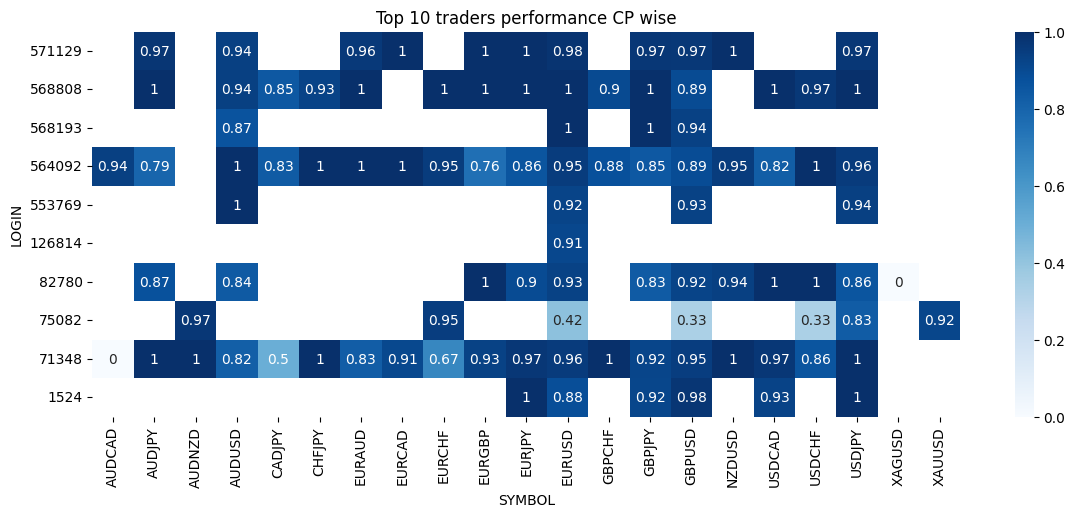

In [125]:
table1 = trader_symbol_grouping_top.pivot('LOGIN', 'SYMBOL', 'win_rate')


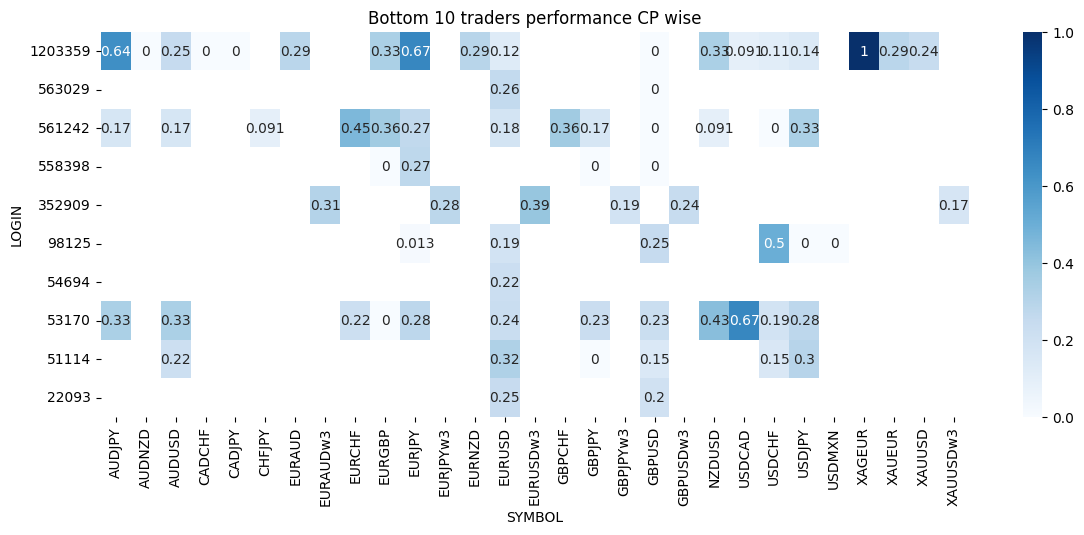

In [124]:
#bottom 10

trader_symbol_grouping_bottom= trader_symbol_grouping[trader_symbol_grouping['LOGIN'].isin(bottom10traders['LOGIN'])]